In [2]:
import pandas as pd
import numpy as np

In [3]:
#Reading the Dataset
#Load the previously pre-processed dataset saved in the csv file “data_refined.csv” into a Pandas Data Frame.
#Hint: Make sure you completed the Accumulative project for module 1.
data_refined = pd.read_csv('data_refined.csv')

In [6]:
data_refined.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878


Feature Selection
Choosing only the most important features for training your classifier is one of the most important steps of the machine learning process. This can be done in many ways.
One of the simplest approaches is choosing the features with the highest correlation to the target data.
The label in this case is the ‘diagnosed’ column.
The Diagnosed column has two distinct values:
M: Malignant Tumor
B: Benign Tumor
Calculate the correlation of all the features to their target labels.
Choose the most correlated features above a certain limit for training.
Output a list of important feature names.

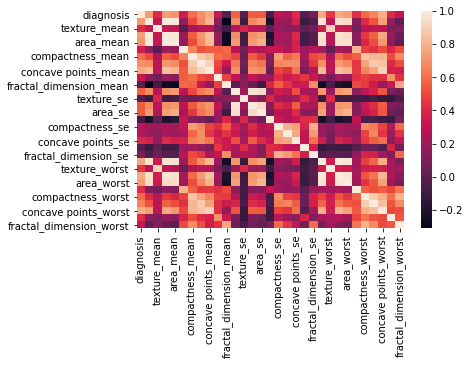

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(data = data_refined.corr())

In [44]:
#Choose the most correlated features above a certain limit for training. Output a list of important feature names.
top_10_corr= list(data_refined.corr(method ='pearson').iloc[:,0].sort_values(ascending=False).nlargest(11).index)[1:]

In [45]:
top_10_corr

['concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst']

Splitting the Data
Split your data as follows:
80% training set
10% Validation set
10% Test set

In [50]:
y = data_refined.iloc[:,0].values
selected_X = data_refined[top_10_corr].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, test_size = 0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1111, random_state=0)

Training Classifiers
Use KNN-Classifier, Random Forest Classifier and Support Vector Classifier (SVC) models to train your data.
Train your full features dataset and your reduced set features dataset.
Get accuracy scores and confusion matrices for both. You need a minimum accuracy score of 94%.
Compare the results.
Hint: You need to choose the optimal value for k using cross validation.